In [98]:
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "Case Study Data 2W Data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows and summary of the dataset
data_head = data.head()
data_head

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Condition,Current Price,Mileage,City,Make Year,Fuel,Transmission,Owners,On Road Price,Metro,RV (%),Age,Run Profile,Brand.1,Model Edition
0,Brand_1,Model_1,Vehicle_1,Used,60000,17500,Delhi,2020,Petrol,Automatic,2,90890,Metro,0.660139,4,14.583333,International,Normal
1,Brand_1,Model_1,Vehicle_2,Used,59100,12400,Mumbai,2018,Petrol,Automatic,2,77460,Metro,0.762974,6,6.888889,International,Normal
2,Brand_1,Model_1,Vehicle_3,Used,73875,4700,Mumbai,2020,Petrol,Automatic,2,92390,Metro,0.799600,4,3.916667,International,Normal
3,Brand_1,Model_1,Vehicle_4,Used,52000,20150,Bangalore,2017,Petrol,Automatic,2,75850,Metro,0.685564,7,9.595238,International,Normal
4,Brand_1,Model_1,Vehicle_5,Used,58000,23652,Bangalore,2018,Petrol,Automatic,2,79330,Metro,0.731123,6,13.140000,International,Normal


In [99]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8397 non-null   object 
 1   Anon_Model         8397 non-null   object 
 2   Anon_Vehicle_Name  8397 non-null   object 
 3   Condition          8397 non-null   object 
 4   Current Price      8397 non-null   int64  
 5   Mileage            8397 non-null   int64  
 6   City               8387 non-null   object 
 7   Make Year          8397 non-null   int64  
 8   Fuel               8397 non-null   object 
 9   Transmission       8396 non-null   object 
 10  Owners             8397 non-null   int64  
 11  On Road Price      8397 non-null   int64  
 12  Metro              8397 non-null   object 
 13  RV (%)             8397 non-null   float64
 14  Age                8397 non-null   int64  
 15  Run Profile        8397 non-null   float64
 16  Brand.1            8397 

In [100]:
data_description = data.describe()
data_description

,Current Price,Mileage,Make Year,Owners,On Road Price,RV (%),Age,Run Profile
count,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000
mean,53370.407646,17392.602120,2017.587353,1.045612,80186.089794,0.657661,6.412647,9.397551
std,15385.509508,13270.685277,2.053802,0.208654,8780.630662,0.141296,2.053802,6.595314
min,15000.000000,0.000000,2014.000000,1.000000,60406.000000,0.197265,1.000000,0.000000
25%,42000.000000,11000.000000,2016.000000,1.000000,74970.000000,0.560224,5.000000,6.190476
50%,52000.000000,16000.000000,2018.000000,1.000000,77650.000000,0.664733,6.000000,8.470556
75%,63000.000000,21764.000000,2019.000000,1.000000,83015.000000,0.756997,8.000000,11.250000
max,122970.000000,388882.000000,2023.000000,2.000000,124960.000000,1.316117,10.000000,139.056667


In [101]:
for column in data.columns:
    non_numeric_values = data[column].apply(lambda x: isinstance(x, str)).sum()
    if non_numeric_values > 0:
        print(f"Column '{column}' has {non_numeric_values} non-numeric values.")

Column 'Anon_Brand' has 8397 non-numeric values.
Column 'Anon_Model' has 8397 non-numeric values.
Column 'Anon_Vehicle_Name' has 8397 non-numeric values.
Column 'Condition' has 8397 non-numeric values.
Column 'City' has 8387 non-numeric values.
Column 'Fuel' has 8397 non-numeric values.
Column 'Transmission' has 8396 non-numeric values.
Column 'Metro' has 8397 non-numeric values.
Column 'Brand.1' has 8397 non-numeric values.
Column 'Model Edition' has 8397 non-numeric values.


In [102]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Anon_Brand            0
Anon_Model            0
Anon_Vehicle_Name     0
Condition             0
Current Price         0
Mileage               0
City                 10
Make Year             0
Fuel                  0
Transmission          1
Owners                0
On Road Price         0
Metro                 0
RV (%)                0
Age                   0
Run Profile           0
Brand.1               0
Model Edition         0
dtype: int64


In [103]:
# Drop rows with missing values
data = data.dropna()
# Check for missing values
print(data.isnull().sum())

Anon_Brand           0
Anon_Model           0
Anon_Vehicle_Name    0
Condition            0
Current Price        0
Mileage              0
City                 0
Make Year            0
Fuel                 0
Transmission         0
Owners               0
On Road Price        0
Metro                0
RV (%)               0
Age                  0
Run Profile          0
Brand.1              0
Model Edition        0
dtype: int64


In [104]:
# Display columns before removal
print("Columns before removal:")
print(data.columns)

# Remove columns with the same value in all rows
df = data.loc[:, data.nunique() > 1]

# Display columns after removal
print("\nColumns after removal:")
print(data.columns)

Columns before removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Condition',
       'Current Price', 'Mileage', 'City', 'Make Year', 'Fuel', 'Transmission',
       'Owners', 'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile',
       'Brand.1', 'Model Edition'],
      dtype='object')

Columns after removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Condition',
       'Current Price', 'Mileage', 'City', 'Make Year', 'Fuel', 'Transmission',
       'Owners', 'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile',
       'Brand.1', 'Model Edition'],
      dtype='object')


In [105]:
categorical_cols = [
    "Anon_Brand",
    "Anon_Model",
    "Anon_Vehicle_Name",
    "City",
    "Transmission",
    "Metro",
    "Brand.1",
    "Model Edition",
]
numerical_cols = [
    "Current Price",
    "Mileage",
    "Make Year",
    "On Road Price",
    "Age",
    "Run Profile",
]

Identifying Outliers
a. Using Statistical Methods (e.g., Z-Score or IQR):

Z-Score: Measures how many standard deviations a data point is from the mean.


In [106]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = data.select_dtypes(include=["float64", "int64"]).apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers detected using Z-score:\n", outliers)

Outliers detected using Z-score:
 Current Price     19
Mileage           65
Make Year          0
Owners           382
On Road Price    128
RV (%)            17
Age                0
Run Profile       86
dtype: int64


In [107]:
from scipy import stats
import numpy as np

# Assuming 'owners' is your pandas Series or column in a DataFrame
z_scores = np.abs(stats.zscore(data["Owners"]))

# Identify outliers
outliers = np.where(z_scores > 3)  # Using 3 as the typical threshold for outliers
outlier_count = len(outliers[0])

print(f"Number of outliers for Owners: {outlier_count}")

Number of outliers for Owners: 382


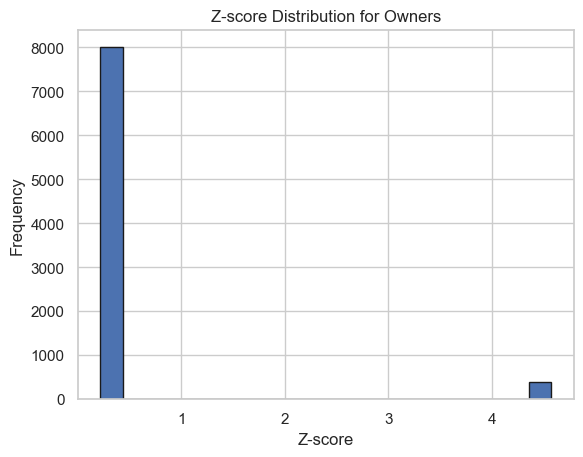

In [108]:
import matplotlib.pyplot as plt

plt.hist(z_scores, bins=20, edgecolor="k")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.title("Z-score Distribution for Owners")
plt.show()

Interquartile Range (IQR): Measures the spread of the middle 50% of values.


In [109]:
# Ensure numerical columns are selected for IQR calculation
numerical_data = data.select_dtypes(include=["float64", "int64"])

# Calculate IQR for numerical columns
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
outliers = (
    (numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))
).sum()
print("Outliers detected using IQR:\n", outliers)

Outliers detected using IQR:
 Current Price     71
Mileage          262
Make Year          0
Owners           382
On Road Price    781
RV (%)            27
Age                0
Run Profile      367
dtype: int64


b. Using Visualization:

Box Plots: Visualize distributions and identify outliers


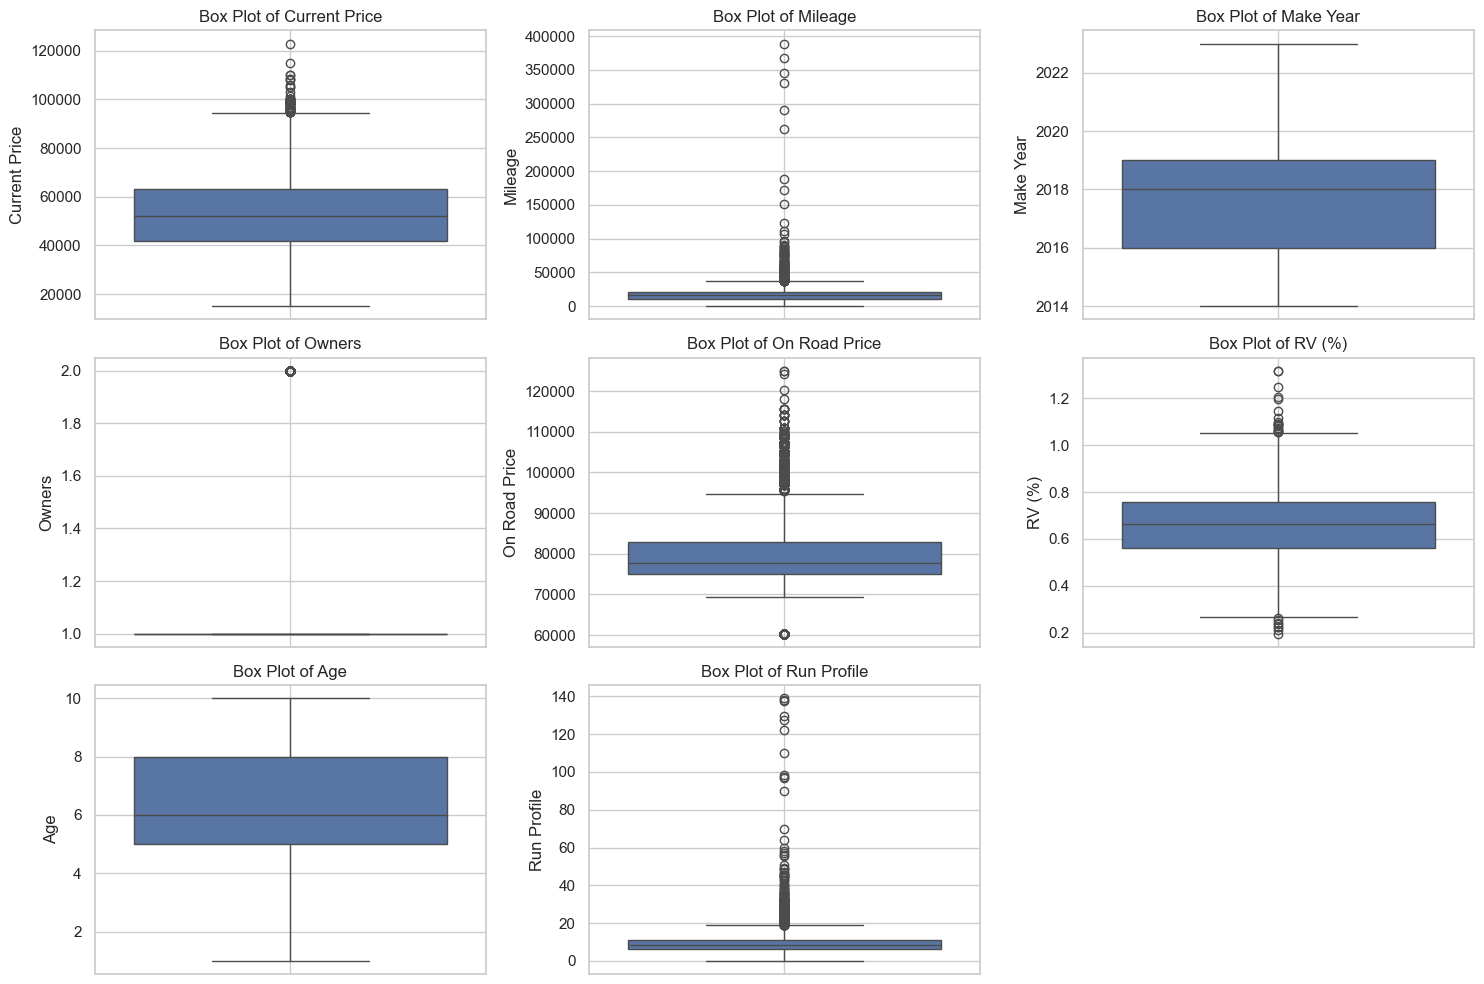

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical columns
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(data[column])
    plt.title(f"Box Plot of {column}")
    plt.grid(True)

plt.tight_layout()
plt.show()

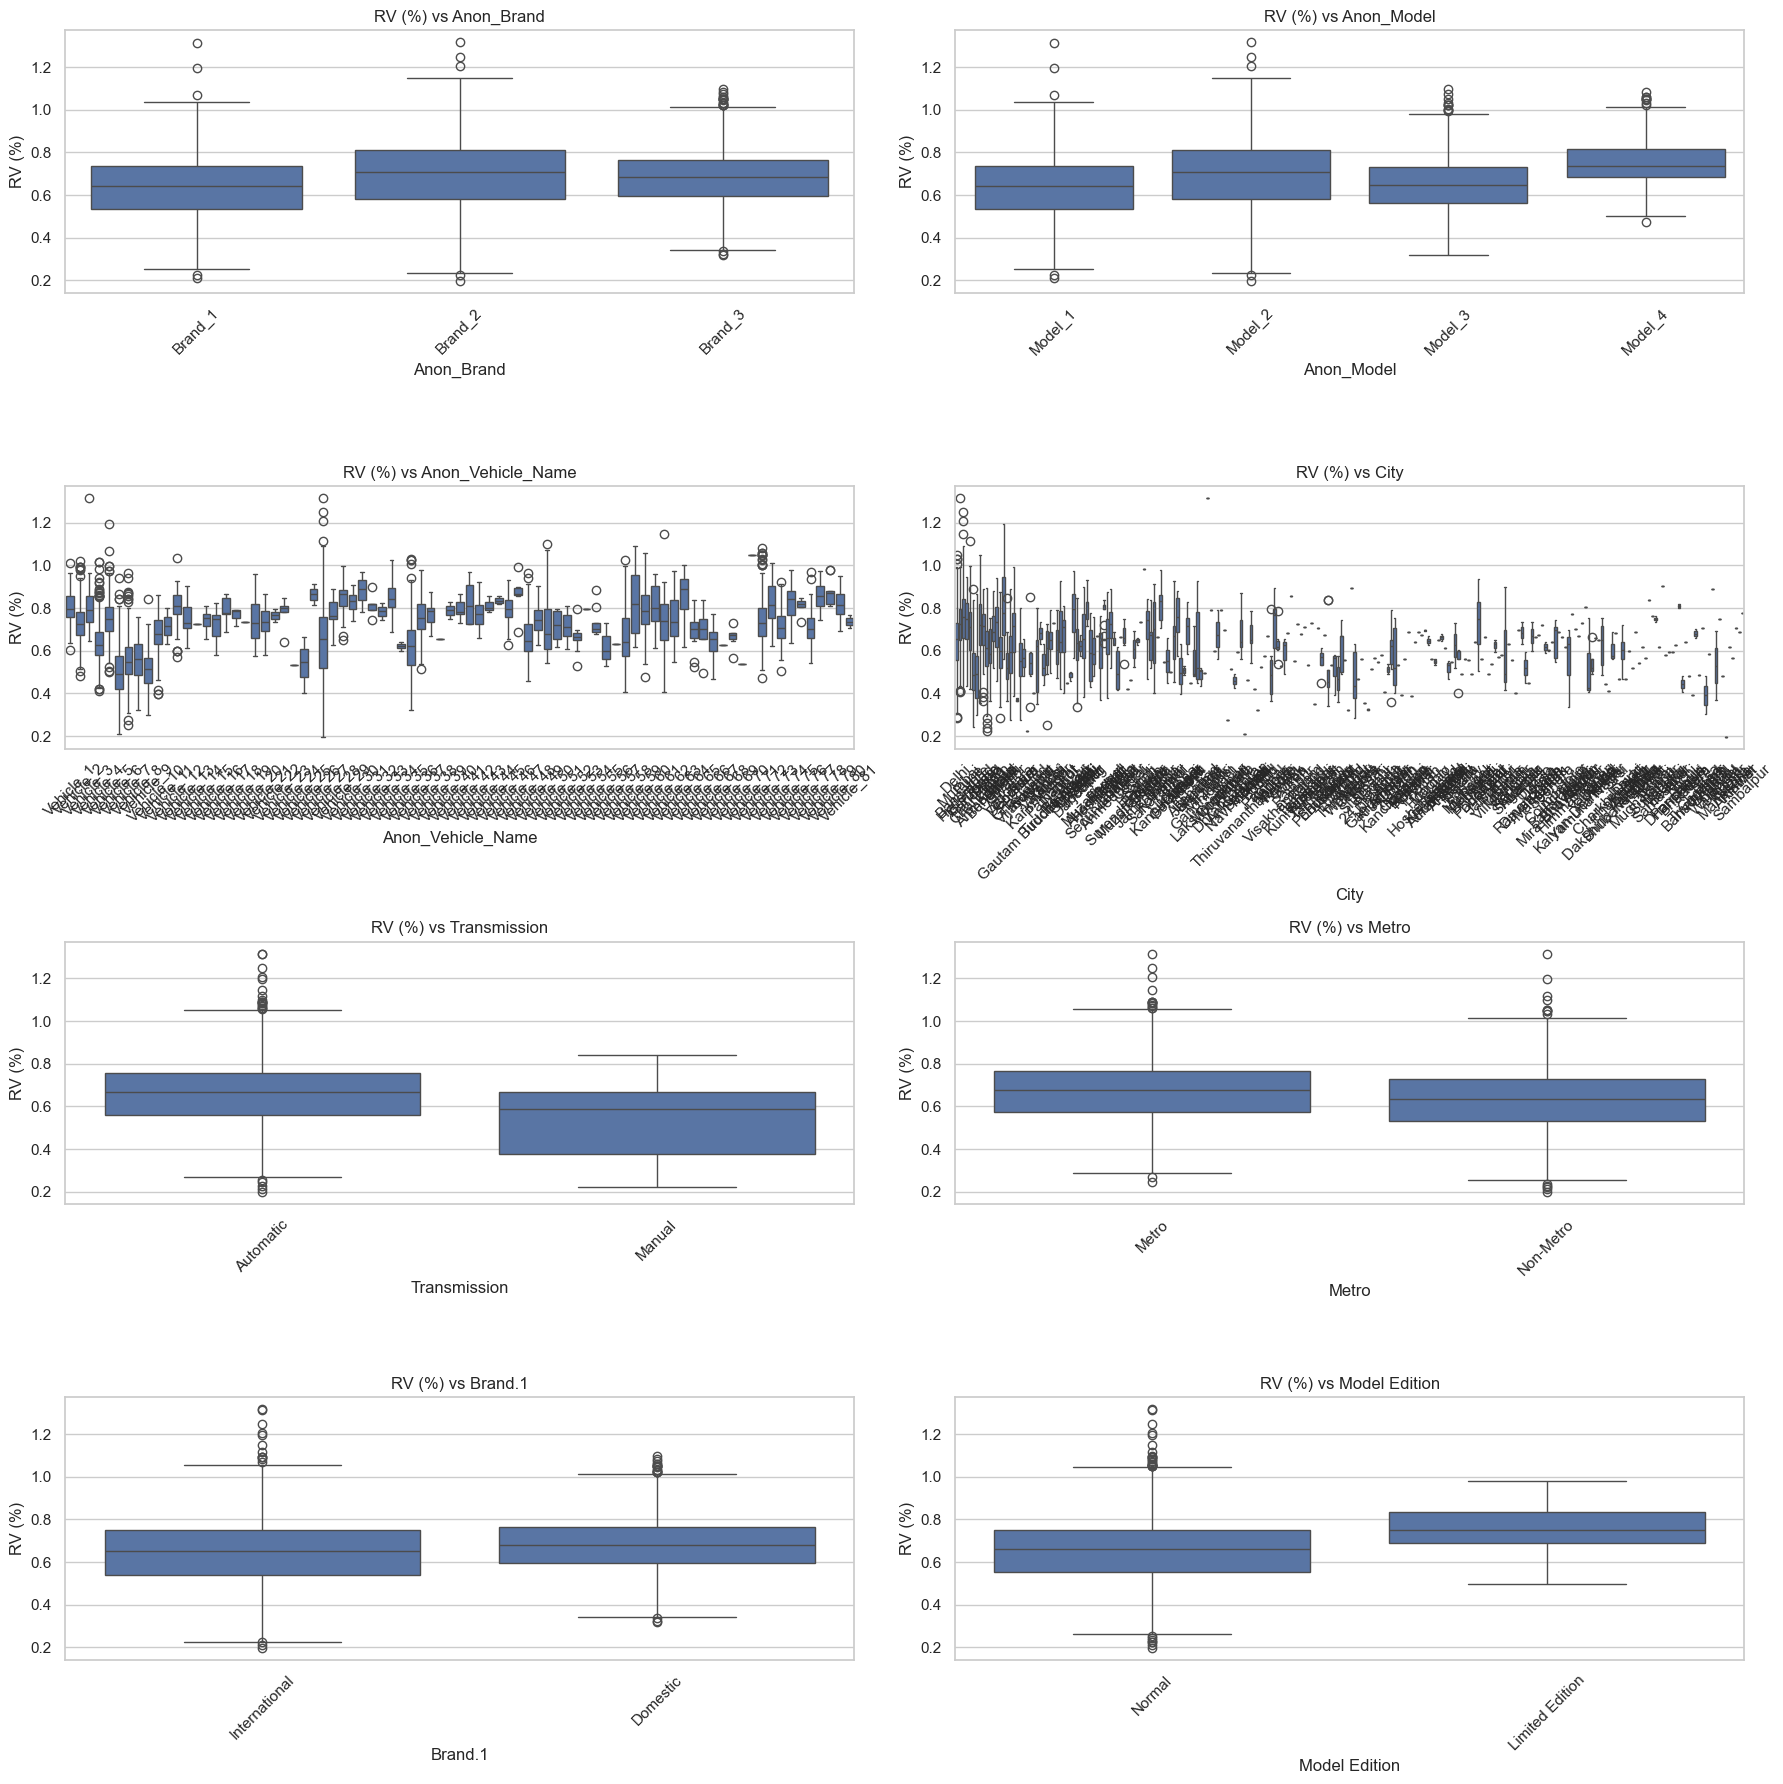

In [111]:
# Plot RV (%) vs each categorical column
plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data, x=col, y="RV (%)")
    plt.title(f"RV (%) vs {col}")
    plt.xlabel(col)
    plt.ylabel("RV (%)")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

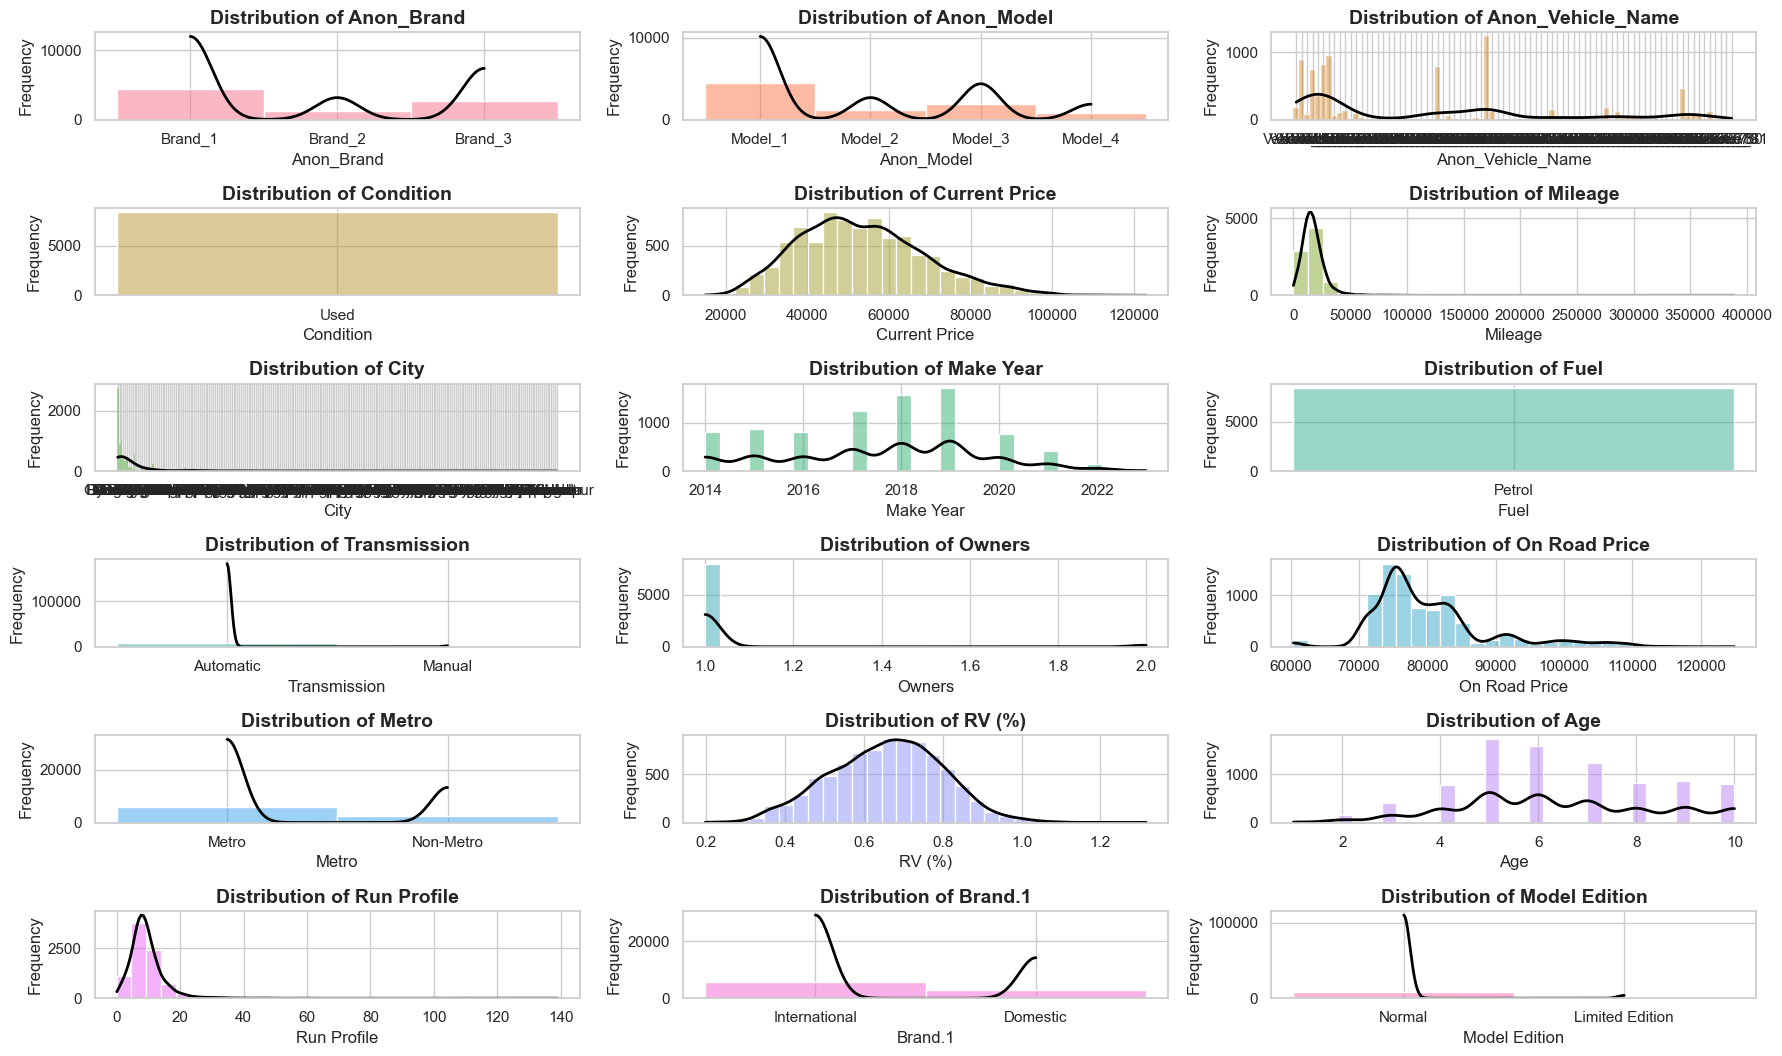

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

attributes = data.columns
plt.figure(figsize=(18, 12))

# Define a color palette with a number of colors equal to the number of attributes
colors = sns.color_palette("husl", len(attributes))

# Loop through each attribute and plot its distribution
for i, attribute in enumerate(attributes):
    plt.subplot(len(attributes) // 3 + 1, 3, i + 1)
    sns.histplot(data[attribute], kde=True, bins=30, color=colors[i])

    # Check if a KDE line was plotted and then modify it
    ax = plt.gca()
    if len(ax.lines) > 0:  # Ensure there is at least one line (the KDE)
        kde_line = ax.lines[-1]
        kde_line.set_linewidth(2)
        kde_line.set_color("black")

    plt.title(f"Distribution of {attribute}", fontsize=14, fontweight="bold")
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Label Encoding and Standard Scaling:


In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate target variable
target = data["RV (%)"]
data = data.drop("RV (%)", axis=1)

# Convert categorical variables using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Convert numerical columns to float and handle non-numeric values
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop rows with NaN values in numerical columns
data = data.dropna(subset=numerical_cols)

# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Re-add target variable (non-scaled)
data["RV (%)"] = target
data.head()

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Condition,Current Price,Mileage,City,Make Year,Fuel,Transmission,Owners,On Road Price,Metro,Age,Run Profile,Brand.1,Model Edition,RV (%)
0,0,0,Vehicle_1,Used,0.429610,0.009416,Delhi,1.173814,Petrol,Automatic,2,1.217935,0,-1.173814,14.583333,1,Normal,0.660139
1,0,0,Vehicle_2,Used,0.371069,-0.375278,Mumbai,0.199469,Petrol,Automatic,2,-0.311320,0,-0.199469,6.888889,1,Normal,0.762974
2,0,0,Vehicle_3,Used,1.332105,-0.956091,Mumbai,1.173814,Petrol,Automatic,2,1.388738,0,-1.173814,3.916667,1,Normal,0.799600
3,0,0,Vehicle_4,Used,-0.090748,0.209306,Bangalore,-0.287703,Petrol,Automatic,2,-0.494648,0,0.287703,9.595238,1,Normal,0.685564
4,0,0,Vehicle_5,Used,0.299520,0.473463,Bangalore,0.199469,Petrol,Automatic,2,-0.098386,0,-0.199469,13.140000,1,Normal,0.731123


In [114]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8387 entries, 0 to 8396
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8387 non-null   int64  
 1   Anon_Model         8387 non-null   int64  
 2   Anon_Vehicle_Name  8387 non-null   int64  
 3   Current Price      8387 non-null   float64
 4   Mileage            8387 non-null   float64
 5   City               8387 non-null   int64  
 6   Make Year          8387 non-null   float64
 7   Transmission       8387 non-null   int64  
 8   Owners             8387 non-null   int64  
 9   On Road Price      8387 non-null   float64
 10  Metro              8387 non-null   int64  
 11  Age                8387 non-null   float64
 12  Run Profile        8387 non-null   float64
 13  Brand.1            8387 non-null   int64  
 14  Model Edition      8387 non-null   int64  
 15  RV (%)             8387 non-null   float64
dtypes: float64(7), int64(9)
memor

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Current Price,Mileage,City,Make Year,Transmission,Owners,On Road Price,Metro,Age,Run Profile,Brand.1,Model Edition,RV (%)
count,8387.000000,8387.00000,8387.000000,8.387000e+03,8.387000e+03,8387.000000,8.387000e+03,8387.00000,8387.000000,8.387000e+03,8387.000000,8.387000e+03,8.387000e+03,8387.000000,8387.000000,8387.000000
mean,0.795994,0.89448,39.264695,-3.388781e-17,1.152186e-16,79.500060,3.805601e-14,0.01240,1.045547,-1.965493e-16,0.296530,2.372147e-17,1.181838e-16,0.672350,0.966973,0.657916
std,0.904315,1.06947,21.874810,1.000060e+00,1.000060e+00,50.495006,1.000060e+00,0.11067,0.208512,1.000060e+00,0.456755,1.000060e+00,1.000060e+00,0.469384,0.178719,0.141122
min,0.000000,0.00000,0.000000,-2.497401e+00,-1.310613e+00,0.000000,-1.749220e+00,0.00000,1.000000,-2.253235e+00,0.000000,-2.635330e+00,-1.424516e+00,0.000000,0.000000,0.197265
25%,0.000000,0.00000,19.000000,-7.411947e-01,-4.808805e-01,62.000000,-7.748751e-01,0.00000,1.000000,-5.948527e-01,0.000000,-6.866416e-01,-4.858456e-01,0.000000,1.000000,0.560316
50%,0.000000,0.00000,33.000000,-9.074788e-02,-1.037294e-01,63.000000,1.994693e-01,0.00000,1.000000,-2.896848e-01,0.000000,-1.994693e-01,-1.407039e-01,1.000000,1.000000,0.664784
75%,2.000000,2.00000,57.000000,6.247436e-01,3.297680e-01,95.000000,6.866416e-01,0.00000,1.000000,3.212202e-01,1.000000,7.748751e-01,2.813366e-01,1.000000,1.000000,0.757057
max,2.000000,3.00000,80.000000,4.525473e+00,2.802284e+01,235.000000,2.635330e+00,1.00000,2.000000,5.097439e+00,1.000000,1.749220e+00,1.966083e+01,1.000000,1.000000,1.316117


Histogram of features:


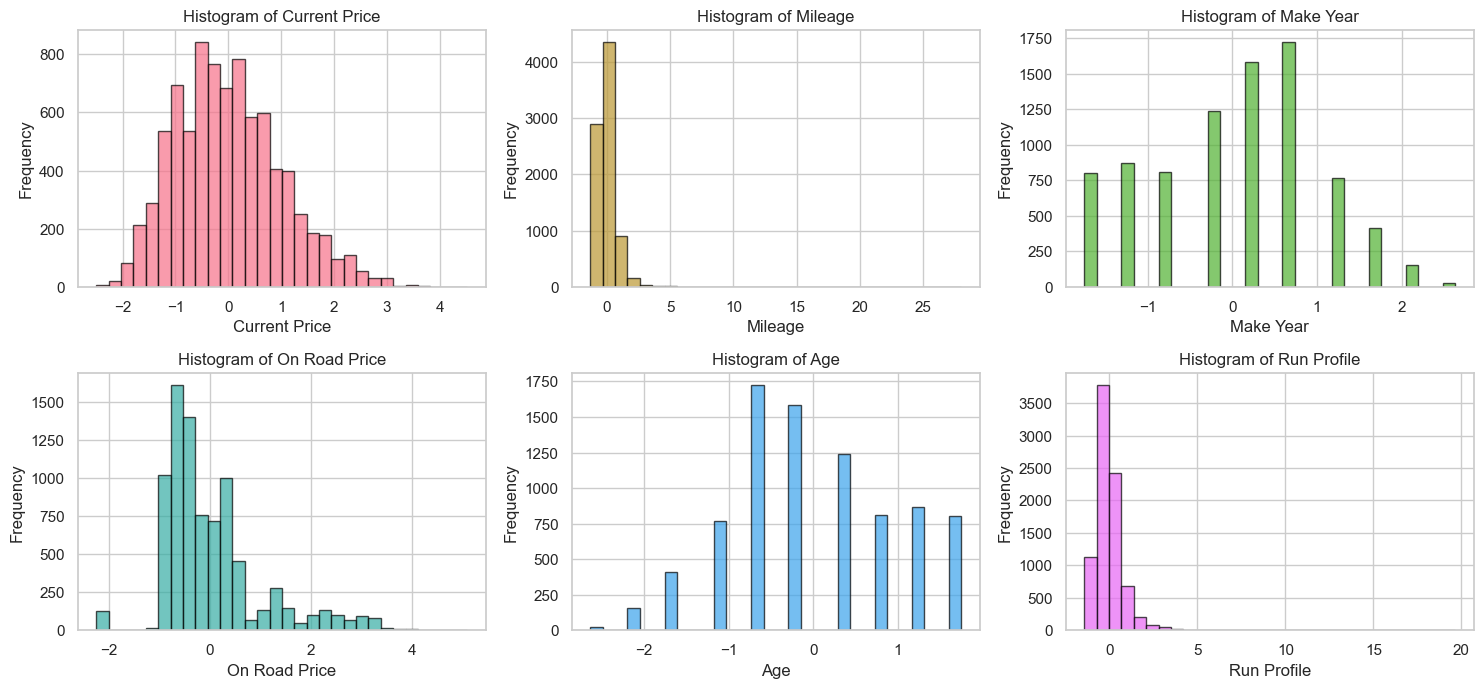

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette of the visualization
sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", len(numerical_cols))

# Plot histograms for numerical features with different colors
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    df[col].plot(
        kind="hist", bins=30, color=color_palette[i], edgecolor="black", alpha=0.7
    )
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

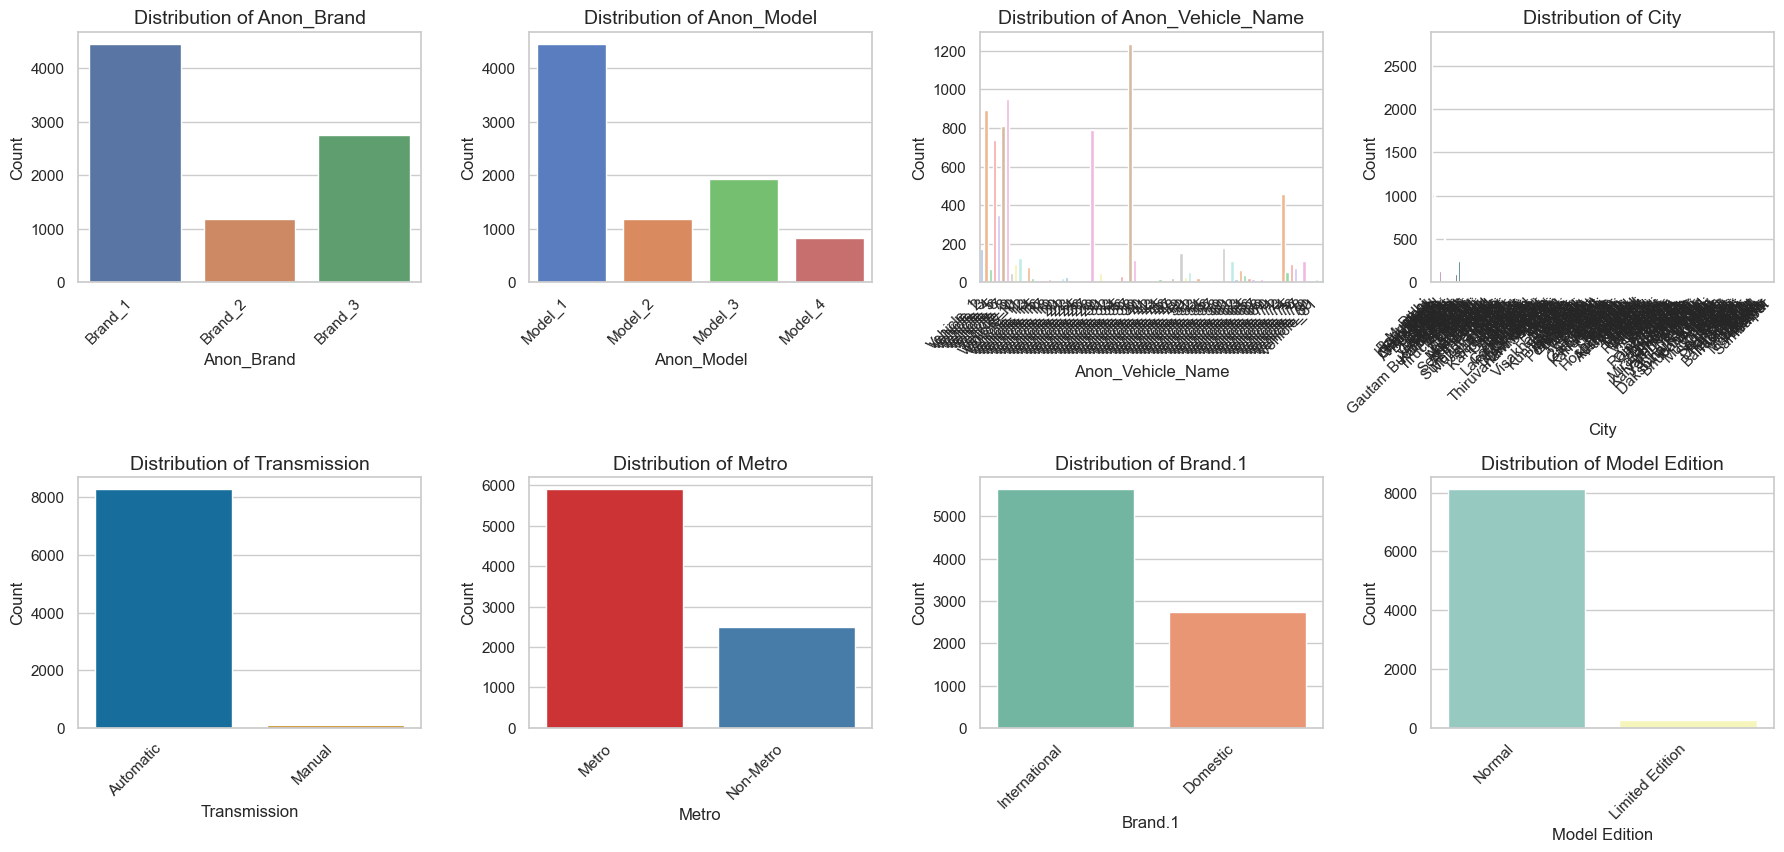

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns


color_palettes = [
    "deep",
    "muted",
    "pastel",
    "dark",
    "colorblind",
    "Set1",
    "Set2",
    "Set3",
    "Paired",
    "Accent",
    "Spectral",
    "husl",
]

# Plot the distribution of categorical features with enhanced color
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=data, x=col, palette=color_palettes[i % len(color_palettes)])
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [117]:
# Select only numeric columns for correlation matrix computation
numeric_data = data.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

,Current Price,Mileage,Make Year,Owners,On Road Price,RV (%),Age,Run Profile
Current Price,1.000000,-0.304573,0.848447,-0.107815,0.785150,0.930604,-0.848447,0.092574
Mileage,-0.304573,1.000000,-0.292717,0.072258,-0.247236,-0.282769,0.292717,0.798699
Make Year,0.848447,-0.292717,1.000000,-0.139183,0.816351,0.717267,-1.000000,0.169675
Owners,-0.107815,0.072258,-0.139183,1.000000,-0.085975,-0.101993,0.139183,0.008600
On Road Price,0.785150,-0.247236,0.816351,-0.085975,1.000000,0.511806,-0.816351,0.152880
RV (%),0.930604,-0.282769,0.717267,-0.101993,0.511806,1.000000,-0.717267,0.041681
Age,-0.848447,0.292717,-1.000000,0.139183,-0.816351,-0.717267,1.000000,-0.169675
Run Profile,0.092574,0.798699,0.169675,0.008600,0.152880,0.041681,-0.169675,1.000000


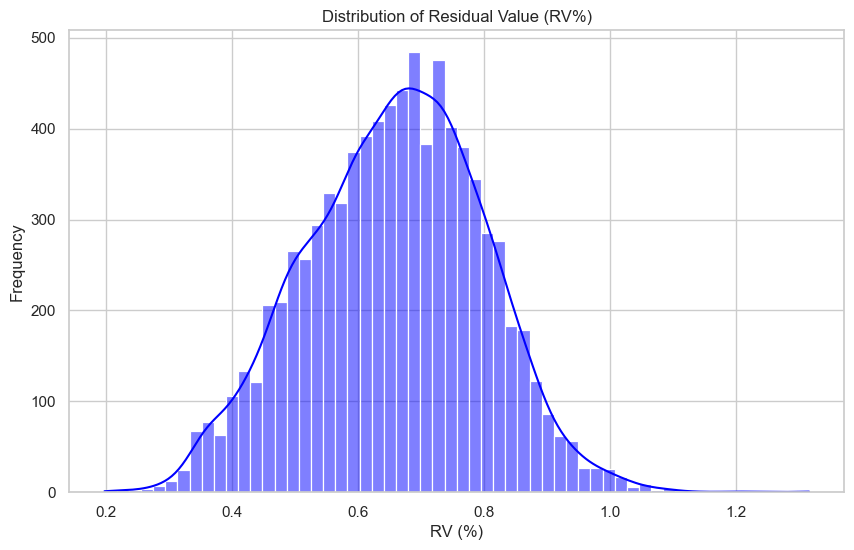

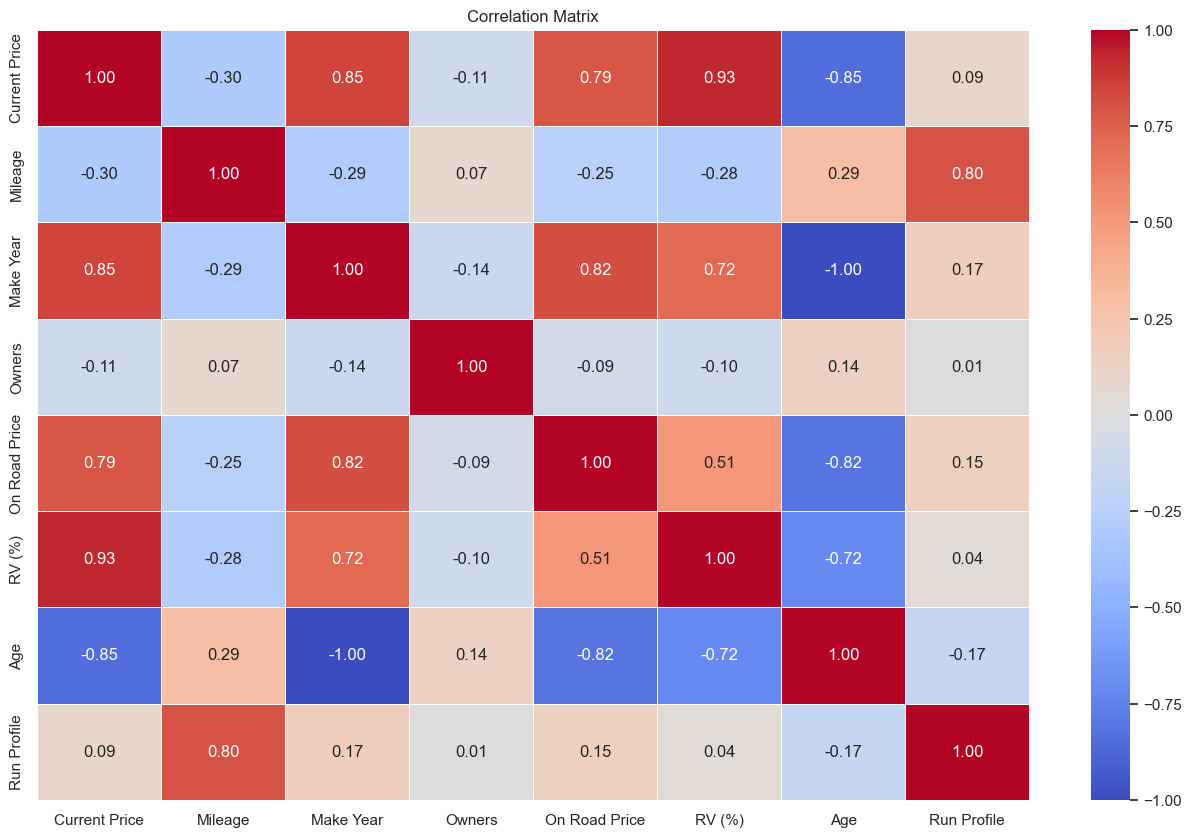

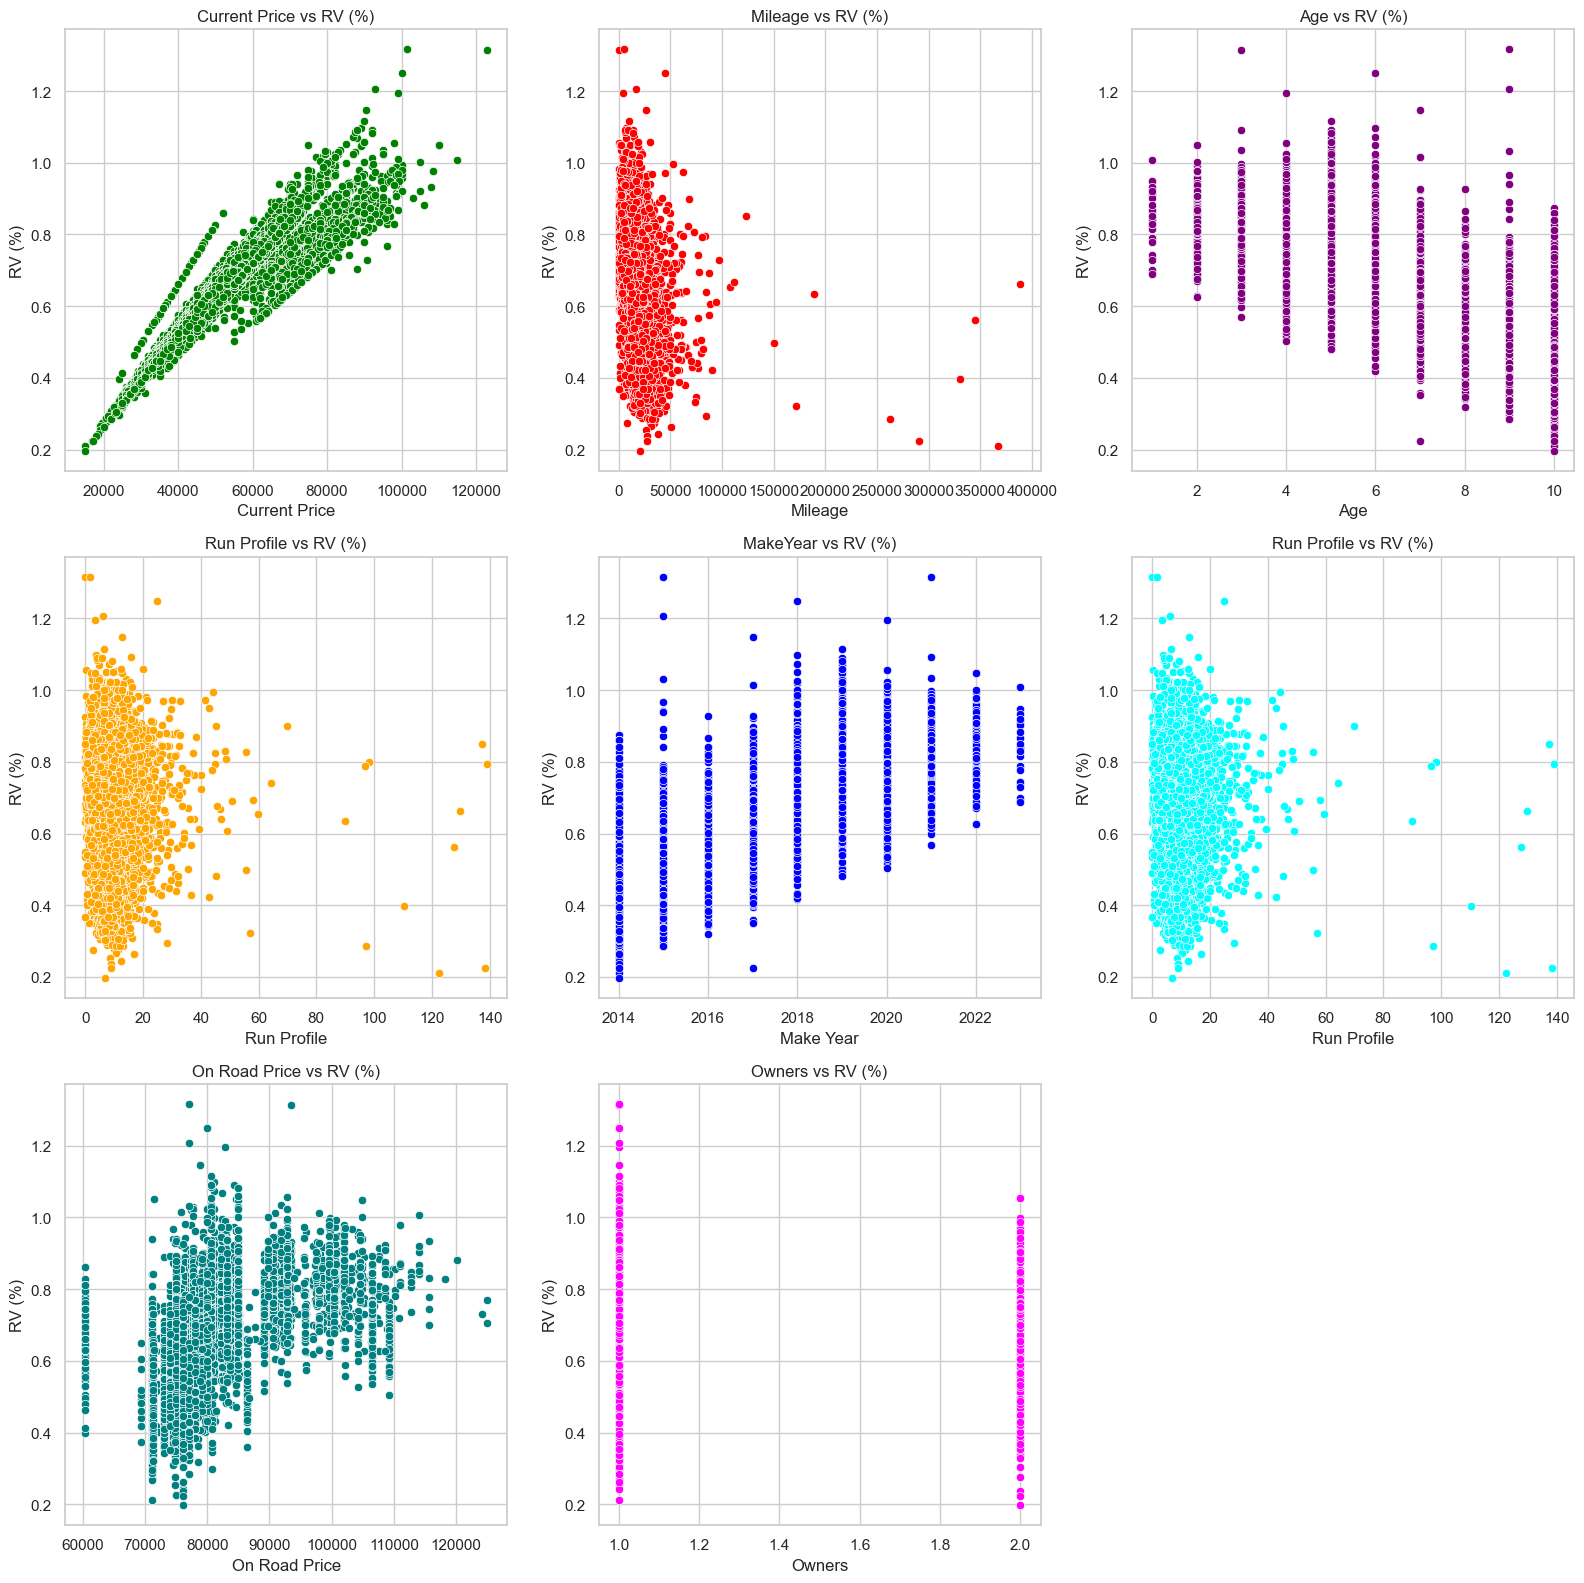

In [118]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plot the distribution of RV (%)
plt.figure(figsize=(10, 6))
sns.histplot(data["RV (%)"], kde=True, color="blue")
plt.title("Distribution of Residual Value (RV%)")
plt.xlabel("RV (%)")
plt.ylabel("Frequency")
plt.show()

# Plot the heatmap of correlations
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for key variables vs RV (%)
plt.figure(figsize=(16, 16))  # Increased figure size for 3x3 layout

plt.subplot(3, 3, 1)
sns.scatterplot(x="Current Price", y="RV (%)", data=data, color="green")
plt.title("Current Price vs RV (%)")

plt.subplot(3, 3, 2)
sns.scatterplot(x="Mileage", y="RV (%)", data=data, color="red")
plt.title("Mileage vs RV (%)")

plt.subplot(3, 3, 3)
sns.scatterplot(x="Age", y="RV (%)", data=data, color="purple")
plt.title("Age vs RV (%)")

plt.subplot(3, 3, 4)
sns.scatterplot(x="Run Profile", y="RV (%)", data=data, color="orange")
plt.title("Run Profile vs RV (%)")

plt.subplot(3, 3, 5)
sns.scatterplot(x="Make Year", y="RV (%)", data=data, color="blue")
plt.title("MakeYear vs RV (%)")

plt.subplot(3, 3, 6)
sns.scatterplot(x="Run Profile", y="RV (%)", data=data, color="cyan")
plt.title("Run Profile vs RV (%)")

plt.subplot(3, 3, 7)
sns.scatterplot(x="On Road Price", y="RV (%)", data=data, color="teal")
plt.title("On Road Price vs RV (%)")

plt.subplot(3, 3, 8)
sns.scatterplot(x="Owners", y="RV (%)", data=data, color="magenta")
plt.title("Owners vs RV (%)")

plt.tight_layout()
plt.show()

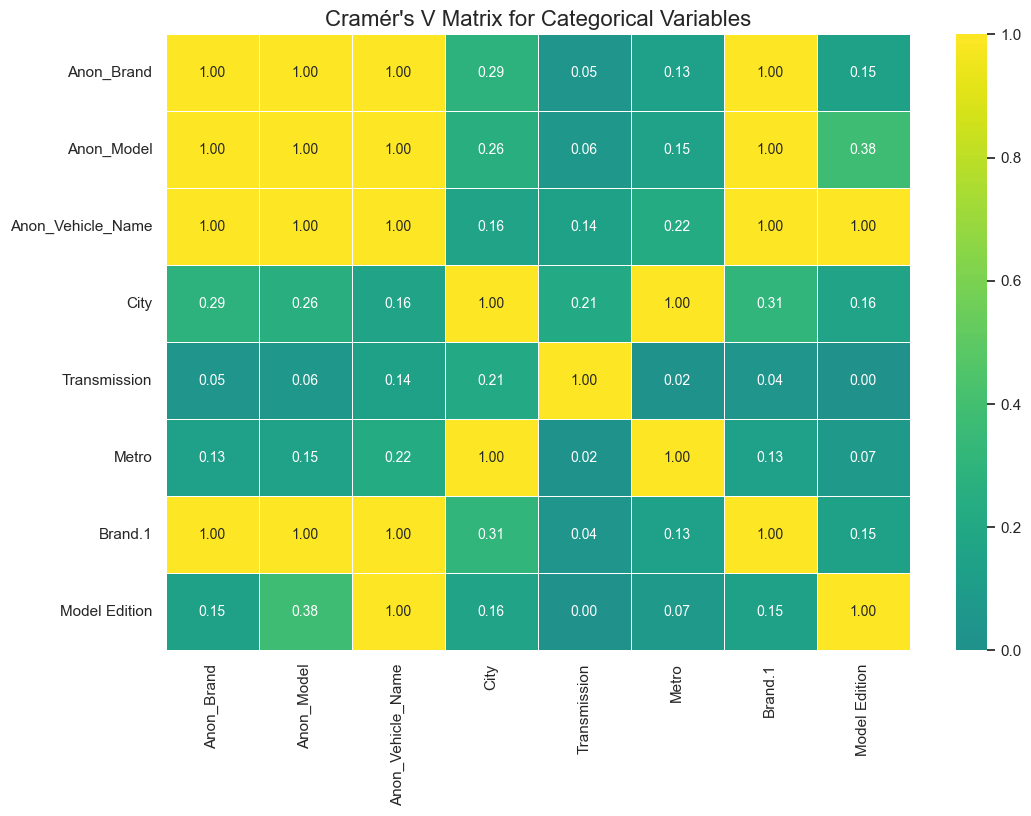

In [120]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))


# Create an empty DataFrame for Cramér's V
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Compute Cramér's V for all pairs of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot the heatmap of Cramér's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    cramers_v_matrix.astype(float),
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.5,
    center=0,
    annot_kws={"size": 10},
)
plt.title("Cramér's V Matrix for Categorical Variables", fontsize=16)
plt.show()

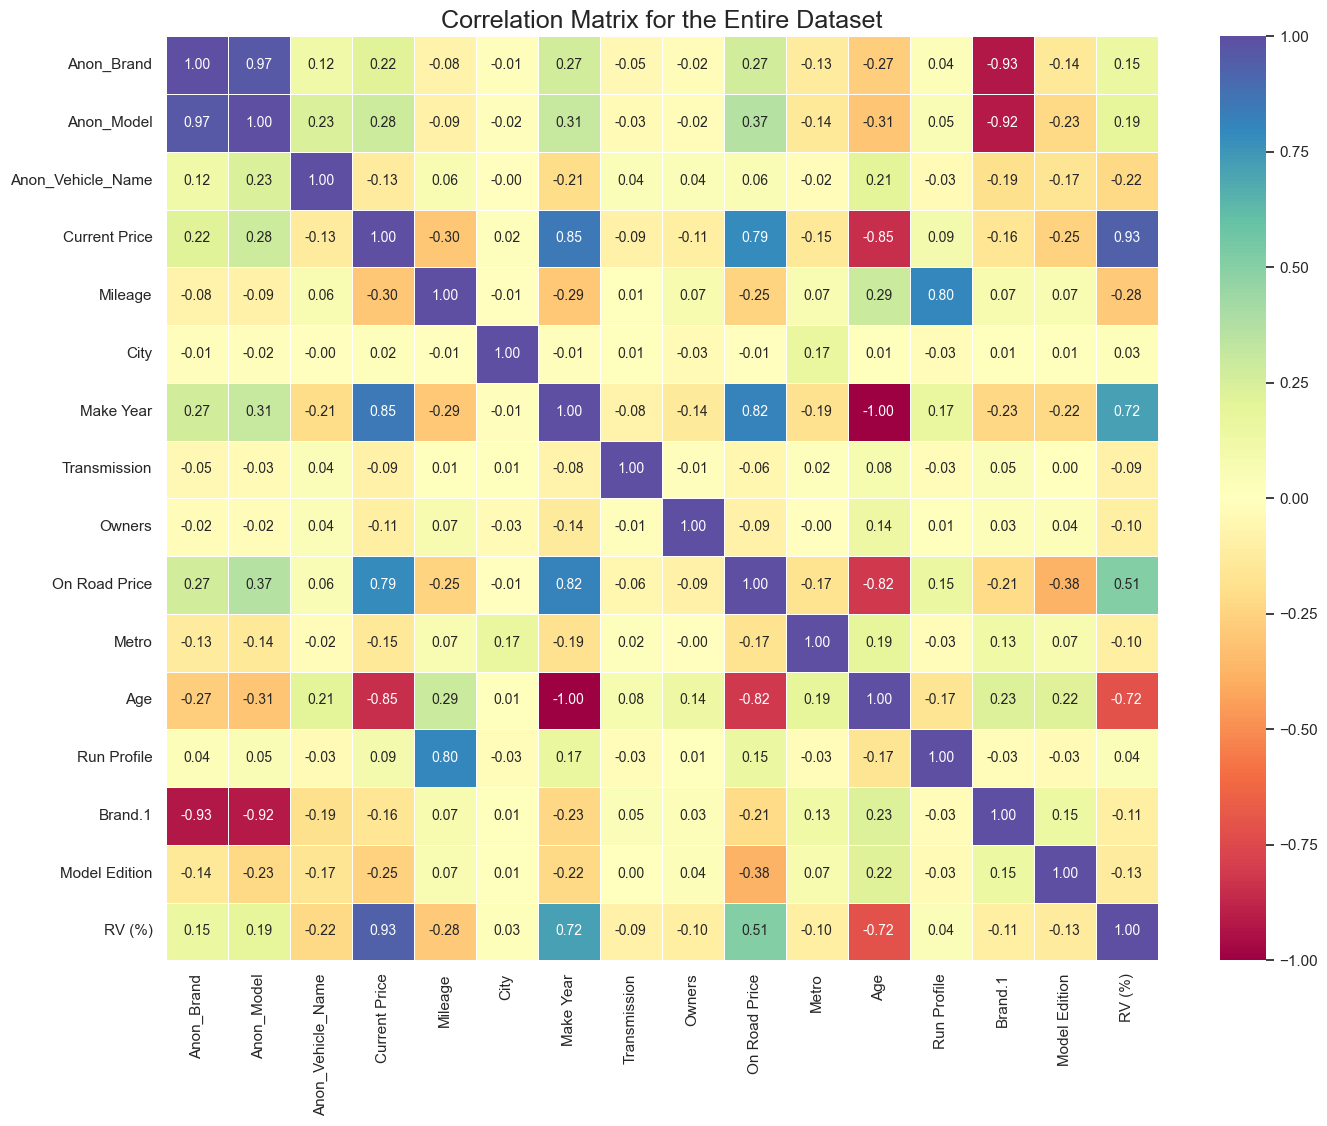

In [121]:
# Compute the correlation matrix for the entire dataset
corr_matrix = df.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Spectral",
    fmt=".2f",
    linewidths=0.5,
    center=0,
    annot_kws={"size": 10},
)
plt.title("Correlation Matrix for the Entire Dataset", fontsize=18)
plt.show()

Hypothesis Testing
1.current price vs residual value:
Null Hypothesis(ρ=0):There is no linear relationship between the two variables.
Alternate Hypothesis: There is a significant linear relationship between the two variables


In [122]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data["Current Price"], data["RV (%)"])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9306037935195702
P-value: 0.0


2.Mileage vs Residual Value (RV%)


In [123]:
correlation, p_value = pearsonr(data["Mileage"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: -0.2827685390082986, P-value: 5.6447558133777175e-154


3.Age vs Residual Value (RV%)


In [124]:
correlation, p_value = pearsonr(data["Age"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: -0.7172667721971794, P-value: 0.0


4.Run Profile vs Residual Value (RV%)


In [125]:
correlation, p_value = pearsonr(data["Run Profile"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.041681275141787155, P-value: 0.00013438259442321072


5.Make Year vs Residual Value (RV%)


In [126]:
correlation, p_value = pearsonr(data["Make Year"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.7172667721971795, P-value: 0.0


6. On-Road Price vs Residual Value (RV%)


In [127]:
# On-Road Price vs RV%
correlation, p_value = pearsonr(data["On Road Price"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.5118059610467265, P-value: 0.0


7. Number of Owners vs Residual Value (RV%)


In [128]:
from scipy.stats import ttest_ind

# Assuming there are only two categories of owners
owners_1 = data[data["Owners"] == 1]["RV (%)"]
owners_2 = data[data["Owners"] == 2]["RV (%)"]

t_stat, p_value = ttest_ind(owners_1, owners_2)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

T-test statistic: 9.388393835673808, P-value: 7.707826447120662e-21


In [129]:
# Check unique values in the 'Anon_Brand' column
print(data["Anon_Brand"].unique())

['Brand_1' 'Brand_2' 'Brand_3']


In [130]:
import scipy.stats as stats

# Extracting RV (%) for each Anon_Brand group
Anon_Brand_1 = data[data["Anon_Brand"] == "Brand_1"]["RV (%)"]
Anon_Brand_2 = data[data["Anon_Brand"] == "Brand_2"]["RV (%)"]
Anon_Brand_3 = data[data["Anon_Brand"] == "Brand_3"]["RV (%)"]

# Verify sizes after filtering
print(f"Size of Anon_Brand_1: {len(Anon_Brand_1)}")
print(f"Size of Anon_Brand_2: {len(Anon_Brand_2)}")
print(f"Size of Anon_Brand_3: {len(Anon_Brand_3)}")

# Perform ANOVA if sample sizes are sufficient
f_stat, p_value = stats.f_oneway(Anon_Brand_1, Anon_Brand_2, Anon_Brand_3)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

# If ANOVA is not applicable, use Kruskal-Wallis test
h_stat, p_value = stats.kruskal(Anon_Brand_1, Anon_Brand_2, Anon_Brand_3)
print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Size of Anon_Brand_1: 4459
Size of Anon_Brand_2: 1180
Size of Anon_Brand_3: 2748
ANOVA F-statistic: 131.16104023874064, P-value: 8.136823306757422e-57
Kruskal-Wallis H-statistic: 239.77246585025202, P-value: 8.591531454860006e-53


In [131]:
# Check unique values in the 'Anon_Model' column
print(data["Condition"].unique())

['Used']


In [132]:
# Check unique values in the 'Anon_Model' column
print(data["Anon_Model"].unique())

['Model_1' 'Model_2' 'Model_3' 'Model_4']


In [133]:
# Adjust the filtering to match string values for Anon_Model
Anon_Model_1 = data[data["Anon_Model"] == "Model_1"]["RV (%)"]
Anon_Model_2 = data[data["Anon_Model"] == "Model_2"]["RV (%)"]
Anon_Model_3 = data[data["Anon_Model"] == "Model_3"]["RV (%)"]
Anon_Model_4 = data[data["Anon_Model"] == "Model_4"]["RV (%)"]

# Verify sizes after filtering
print(f"Size of Anon_Model_1: {len(Anon_Model_1)}")
print(f"Size of Anon_Model_2: {len(Anon_Model_2)}")
print(f"Size of Anon_Model_3: {len(Anon_Model_3)}")
print(f"Size of Anon_Model_4: {len(Anon_Model_4)}")

# Perform ANOVA if sample sizes are sufficient
f_stat, p_value = stats.f_oneway(Anon_Model_1, Anon_Model_2, Anon_Model_3, Anon_Model_4)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

# If ANOVA is not applicable, use Kruskal-Wallis test
h_stat, p_value = stats.kruskal(Anon_Model_1, Anon_Model_2, Anon_Model_3, Anon_Model_4)
print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Size of Anon_Model_1: 4459
Size of Anon_Model_2: 1180
Size of Anon_Model_3: 1922
Size of Anon_Model_4: 826
ANOVA F-statistic: 197.0045299832276, P-value: 1.8143884658773674e-123
Kruskal-Wallis H-statistic: 564.5423163622368, P-value: 4.894960208637662e-122


In [134]:
# Check unique values in the 'Anon_Vehicle' column
print(data["Anon_Vehicle_Name"].unique())

['Vehicle_1' 'Vehicle_2' 'Vehicle_3' 'Vehicle_4' 'Vehicle_5' 'Vehicle_6'
 'Vehicle_7' 'Vehicle_8' 'Vehicle_9' 'Vehicle_10' 'Vehicle_11'
 'Vehicle_12' 'Vehicle_13' 'Vehicle_14' 'Vehicle_15' 'Vehicle_16'
 'Vehicle_17' 'Vehicle_18' 'Vehicle_19' 'Vehicle_20' 'Vehicle_21'
 'Vehicle_22' 'Vehicle_23' 'Vehicle_24' 'Vehicle_25' 'Vehicle_26'
 'Vehicle_27' 'Vehicle_28' 'Vehicle_29' 'Vehicle_30' 'Vehicle_31'
 'Vehicle_32' 'Vehicle_33' 'Vehicle_34' 'Vehicle_35' 'Vehicle_36'
 'Vehicle_37' 'Vehicle_38' 'Vehicle_39' 'Vehicle_40' 'Vehicle_41'
 'Vehicle_42' 'Vehicle_43' 'Vehicle_44' 'Vehicle_45' 'Vehicle_46'
 'Vehicle_47' 'Vehicle_48' 'Vehicle_49' 'Vehicle_50' 'Vehicle_51'
 'Vehicle_52' 'Vehicle_53' 'Vehicle_54' 'Vehicle_55' 'Vehicle_56'
 'Vehicle_57' 'Vehicle_58' 'Vehicle_59' 'Vehicle_60' 'Vehicle_61'
 'Vehicle_62' 'Vehicle_63' 'Vehicle_64' 'Vehicle_65' 'Vehicle_66'
 'Vehicle_67' 'Vehicle_68' 'Vehicle_69' 'Vehicle_70' 'Vehicle_71'
 'Vehicle_72' 'Vehicle_73' 'Vehicle_74' 'Vehicle_75' 'Vehicle_76'
 'Vehi

In [135]:
# Extract unique vehicle names
vehicle_names = data["Anon_Vehicle_Name"].unique()

# Dictionary to store RV (%) data for each vehicle
vehicle_data = {
    vehicle: data[data["Anon_Vehicle_Name"] == vehicle]["RV (%)"]
    for vehicle in vehicle_names
}

# Print sizes of each vehicle data
for vehicle, rv_data in vehicle_data.items():
    print(f"Size of {vehicle}: {len(rv_data)}")

# Perform ANOVA if sample sizes are sufficient
if all(
    len(rv_data) > 1 for rv_data in vehicle_data.values()
):  # Check if all groups have more than 1 sample
    f_stat, p_value = stats.f_oneway(*vehicle_data.values())
    print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")
else:
    # If sample sizes are insufficient, perform Kruskal-Wallis test
    h_stat, p_value = stats.kruskal(*vehicle_data.values())
    print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Size of Vehicle_1: 175
Size of Vehicle_2: 891
Size of Vehicle_3: 67
Size of Vehicle_4: 737
Size of Vehicle_5: 349
Size of Vehicle_6: 810
Size of Vehicle_7: 949
Size of Vehicle_8: 50
Size of Vehicle_9: 94
Size of Vehicle_10: 124
Size of Vehicle_11: 2
Size of Vehicle_12: 81
Size of Vehicle_13: 20
Size of Vehicle_14: 1
Size of Vehicle_15: 11
Size of Vehicle_16: 14
Size of Vehicle_17: 15
Size of Vehicle_18: 3
Size of Vehicle_19: 1
Size of Vehicle_20: 22
Size of Vehicle_21: 30
Size of Vehicle_22: 2
Size of Vehicle_23: 5
Size of Vehicle_24: 1
Size of Vehicle_25: 3
Size of Vehicle_26: 2
Size of Vehicle_27: 788
Size of Vehicle_28: 9
Size of Vehicle_29: 48
Size of Vehicle_30: 4
Size of Vehicle_31: 3
Size of Vehicle_32: 5
Size of Vehicle_33: 2
Size of Vehicle_34: 31
Size of Vehicle_35: 2
Size of Vehicle_36: 1236
Size of Vehicle_37: 118
Size of Vehicle_38: 13
Size of Vehicle_39: 1
Size of Vehicle_40: 3
Size of Vehicle_41: 6
Size of Vehicle_42: 5
Size of Vehicle_43: 16
Size of Vehicle_44: 3
Size o

Fuel T test & P value:


In [136]:
print(data["Fuel"].unique())

['Petrol']


In [137]:
# Filter data based on fuel types
petrol_rv = data[data["Fuel"] == "Petrol"]["RV (%)"]
automatic_rv = data[data["Fuel"] == "Automatic"]["RV (%)"]

# Print sizes after filtering
print(f"Size of Petrol: {len(petrol_rv)}")
print(f"Size of Automatic: {len(automatic_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(
    petrol_rv, automatic_rv, equal_var=False
)  # Welch's t-test is used when variances are not assumed to be equal
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Petrol: 8387
Size of Automatic: 0
T-test statistic: nan, P-value: nan


Transmission T test & P value:


In [138]:
print(data["Transmission"].unique())

['Automatic' 'Manual']


In [139]:
# Filter data to exclude missing values (nan) and based on transmission types
automatic_rv = data[data["Transmission"] == "Automatic"]["RV (%)"].dropna()
manual_rv = data[data["Transmission"] == "Manual"]["RV (%)"].dropna()

# Print sizes after filtering
print(f"Size of Automatic: {len(automatic_rv)}")
print(f"Size of Manual: {len(manual_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(
    automatic_rv, manual_rv, equal_var=False
)  # Welch's t-test for unequal variances
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Automatic: 8283
Size of Manual: 104
T-test statistic: 7.275376488269412, P-value: 6.493834593279665e-11


Metro T test & P value:


In [140]:
print(data["Metro"].unique())

['Metro' 'Non-Metro']


In [141]:
# Filter data based on city type (Metro vs Non-Metro)
metro_rv = data[data["Metro"] == "Metro"]["RV (%)"].dropna()
non_metro_rv = data[data["Metro"] == "Non-Metro"]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of Metro: {len(metro_rv)}")
print(f"Size of Non-Metro: {len(non_metro_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(
    metro_rv, non_metro_rv, equal_var=False
)  # Welch's t-test for unequal variances
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Metro: 5900
Size of Non-Metro: 2487
T-test statistic: 9.52756877512456, P-value: 2.4701293101498128e-21


Brand 1 T test and P value:


In [142]:
print(data["Brand.1"].unique())

['International' 'Domestic']


In [143]:
# Filter the data for 'International' and 'Domestic' in the 'Brand.1' column
international_rv = data[data["Brand.1"] == "International"]["RV (%)"].dropna()
domestic_rv = data[data["Brand.1"] == "Domestic"]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of International: {len(international_rv)}")
print(f"Size of Domestic: {len(domestic_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(international_rv, domestic_rv, equal_var=False)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of International: 5639
Size of Domestic: 2748
T-test statistic: -10.233497354826895, P-value: 2.1930862546821832e-24


Model edition T test & P value:


In [144]:
print(data["Model Edition"].unique())

['Normal' 'Limited Edition']


In [145]:
# Filter the data for 'Normal' and 'Limited Edition' in the 'Model Edition' column
normal_rv = data[data["Model Edition"] == "Normal"]["RV (%)"].dropna()
limited_edition_rv = data[data["Model Edition"] == "Limited Edition"]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of Normal: {len(normal_rv)}")
print(f"Size of Limited Edition: {len(limited_edition_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(normal_rv, limited_edition_rv, equal_var=False)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Normal: 8110
Size of Limited Edition: 277
T-test statistic: -16.664305802332464, P-value: 3.590357305973808e-45


Building a Model:


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X = data[
    [
        "Current Price",
        "Mileage",
        "Make Year",
        "Age",
        "On Road Price",
        "Anon_Brand",
        "Anon_Model",
        "Metro",
        "Brand.1",
    ]
]
y = data["RV (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [149]:
# Convert columns to numeric and coerce errors to NaN
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Drop rows with NaN values in numerical columns
data = data.dropna(subset=numerical_cols)

LinearRegression Performance:
Mean Absolute Error (MAE): 0.008422461867761955
Mean Squared Error (MSE): 0.000169902544000128
Root Mean Squared Error (RMSE): 0.013034667007642657
R² Score: 0.9918536925946255
--------------------------------------------------
DecisionTreeRegressor Performance:
Mean Absolute Error (MAE): 0.0020584666106290912
Mean Squared Error (MSE): 6.416548135587287e-05
Root Mean Squared Error (RMSE): 0.00801033590780517
R² Score: 0.9969234613936189
--------------------------------------------------
RandomForestRegressor Performance:
Mean Absolute Error (MAE): 0.0015051515282015692
Mean Squared Error (MSE): 5.903363498603661e-05
Root Mean Squared Error (RMSE): 0.007683334887015963
R² Score: 0.9971695177333392
--------------------------------------------------


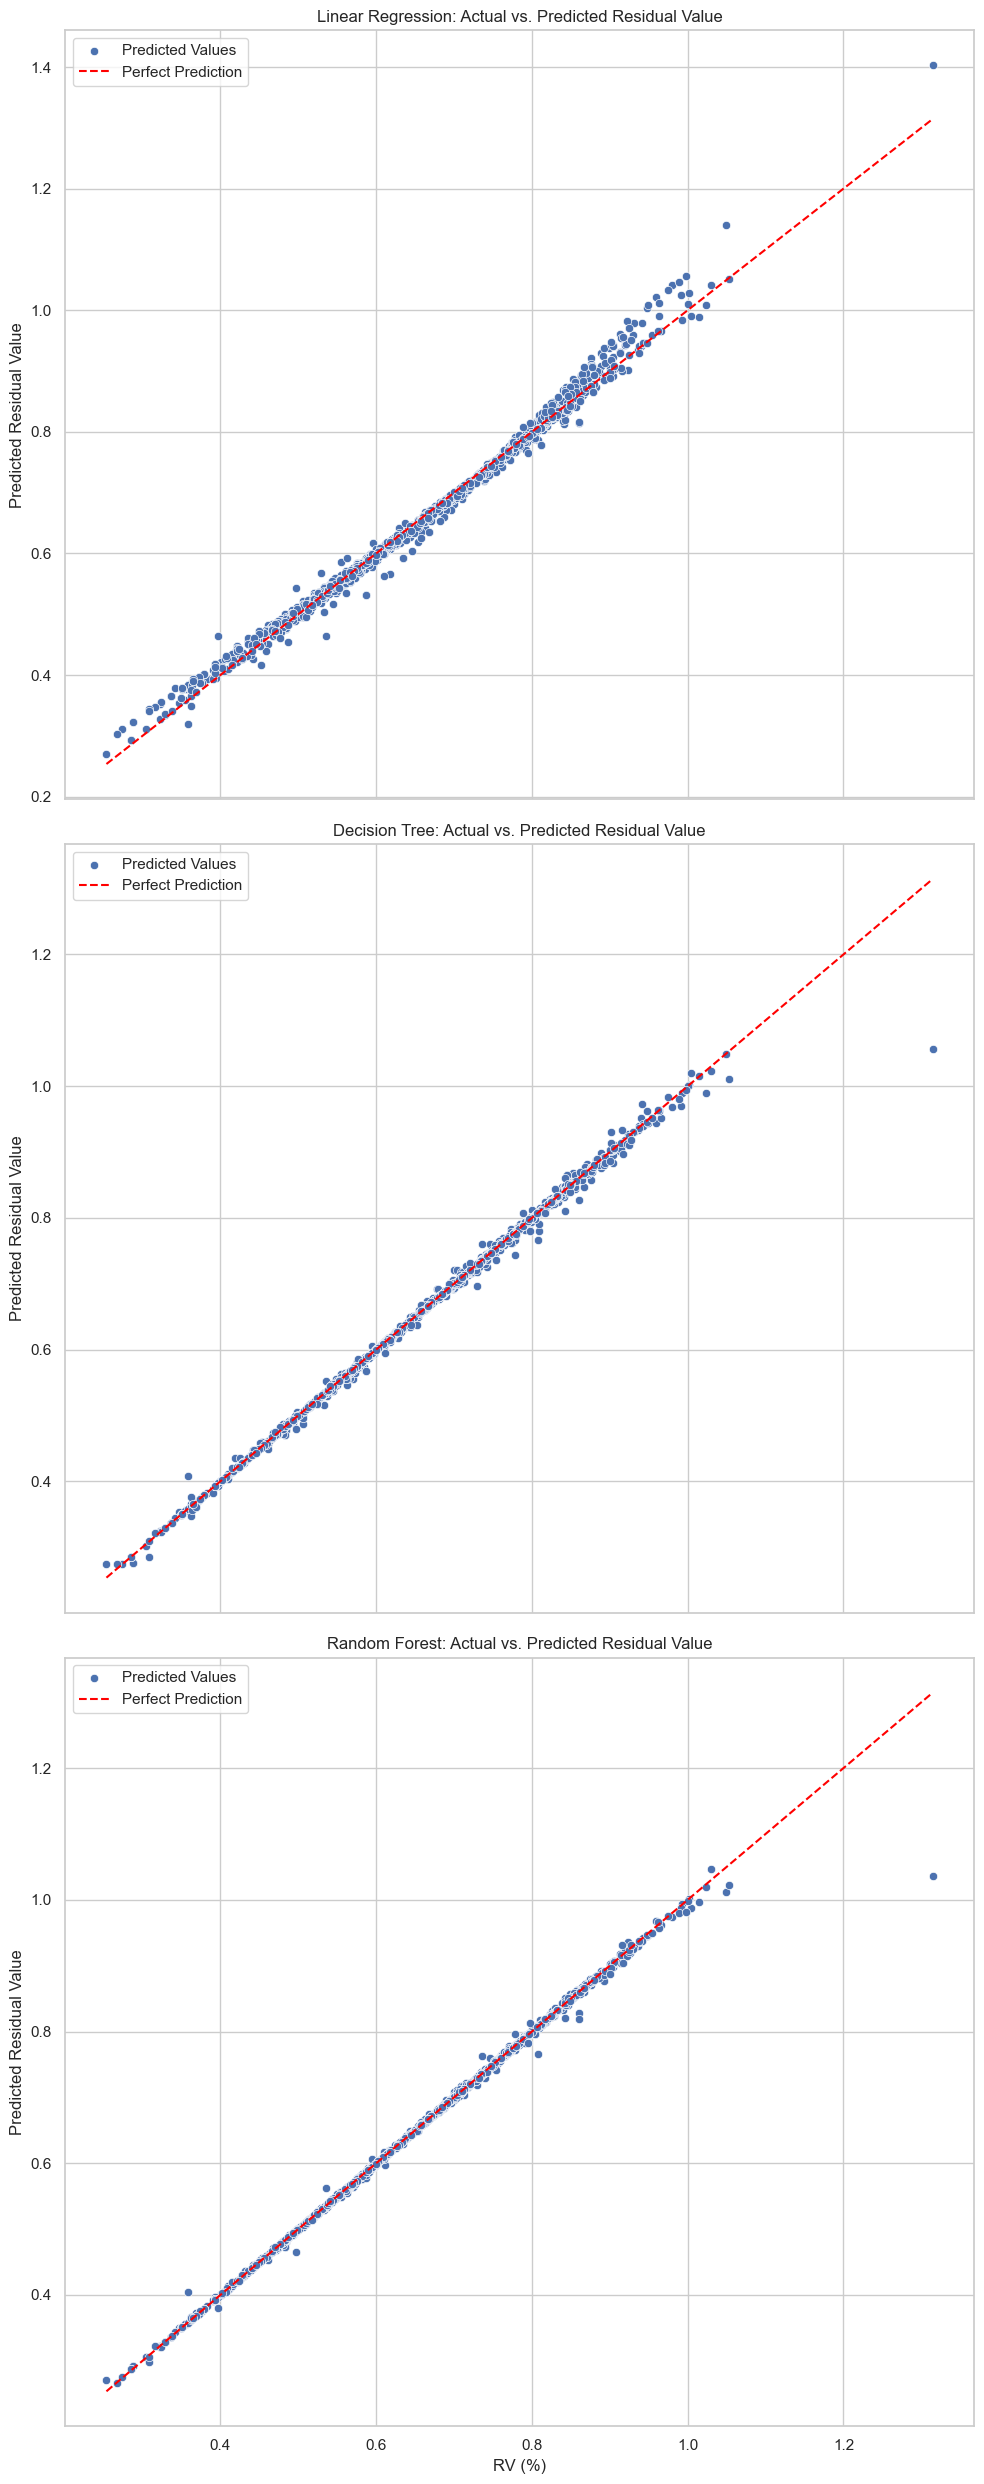

In [150]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the categorical and numerical columns
categorical_cols = [
    "Anon_Brand",
    "Anon_Model",
    "Metro",
    "Brand.1",
]
numerical_cols = ["Current Price", "Mileage", "Make Year", "Age", "On Road Price"]

# Create a preprocessor to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Scale numerical features
        (
            "cat",
            OneHotEncoder(),
            categorical_cols,
        ),  # One-hot encode categorical features
    ]
)

# Define the models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1, n_estimators=100),
}


# Create a function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create a pipeline with the given model
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Output the evaluation metrics
    print(f"{model.__class__.__name__} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print("-" * 50)

    return y_pred


# Split the data into training and testing sets
X = df.drop(columns=["RV (%)"])
y = df["RV (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Store predictions
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Define the predictions from all models
y_pred_lr = predictions.get("Linear Regression")
y_pred_dt = predictions.get("Decision Tree")
y_pred_rf = predictions.get("Random Forest")

# Create a figure with subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(10, 25), sharex=True)

# Scatter plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0], label="Predicted Values")
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[0].set_ylabel("Predicted Residual Value")
axes[0].set_title("Linear Regression: Actual vs. Predicted Residual Value")
axes[0].legend()

# Scatter plot for Decision Tree
sns.scatterplot(x=y_test, y=y_pred_dt, ax=axes[1], label="Predicted Values")
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[1].set_ylabel("Predicted Residual Value")
axes[1].set_title("Decision Tree: Actual vs. Predicted Residual Value")
axes[1].legend()

# Scatter plot for Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[2], label="Predicted Values")
axes[2].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[2].set_ylabel("Predicted Residual Value")
axes[2].set_title("Random Forest: Actual vs. Predicted Residual Value")
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [151]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [152]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Anon_Vehicle_Name
- City
- Model Edition
- Owners
- Run Profile
- ...


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)

print("\nDecision Tree Regression:")
print("MSE:", mse_dt)
print("R-squared:", r2_dt)

print("\nRandom Forest Regression:")
print("MSE:", mse_rf)
print("R-squared:", r2_rf)

Linear Regression:
MSE: 0.00017492928832611149
R-squared: 0.9916126755764951

Decision Tree Regression:
MSE: 6.271866577679007e-05
R-squared: 0.9969928317761252

Random Forest Regression:
MSE: 5.780236890798274e-05
R-squared: 0.9972285531764438


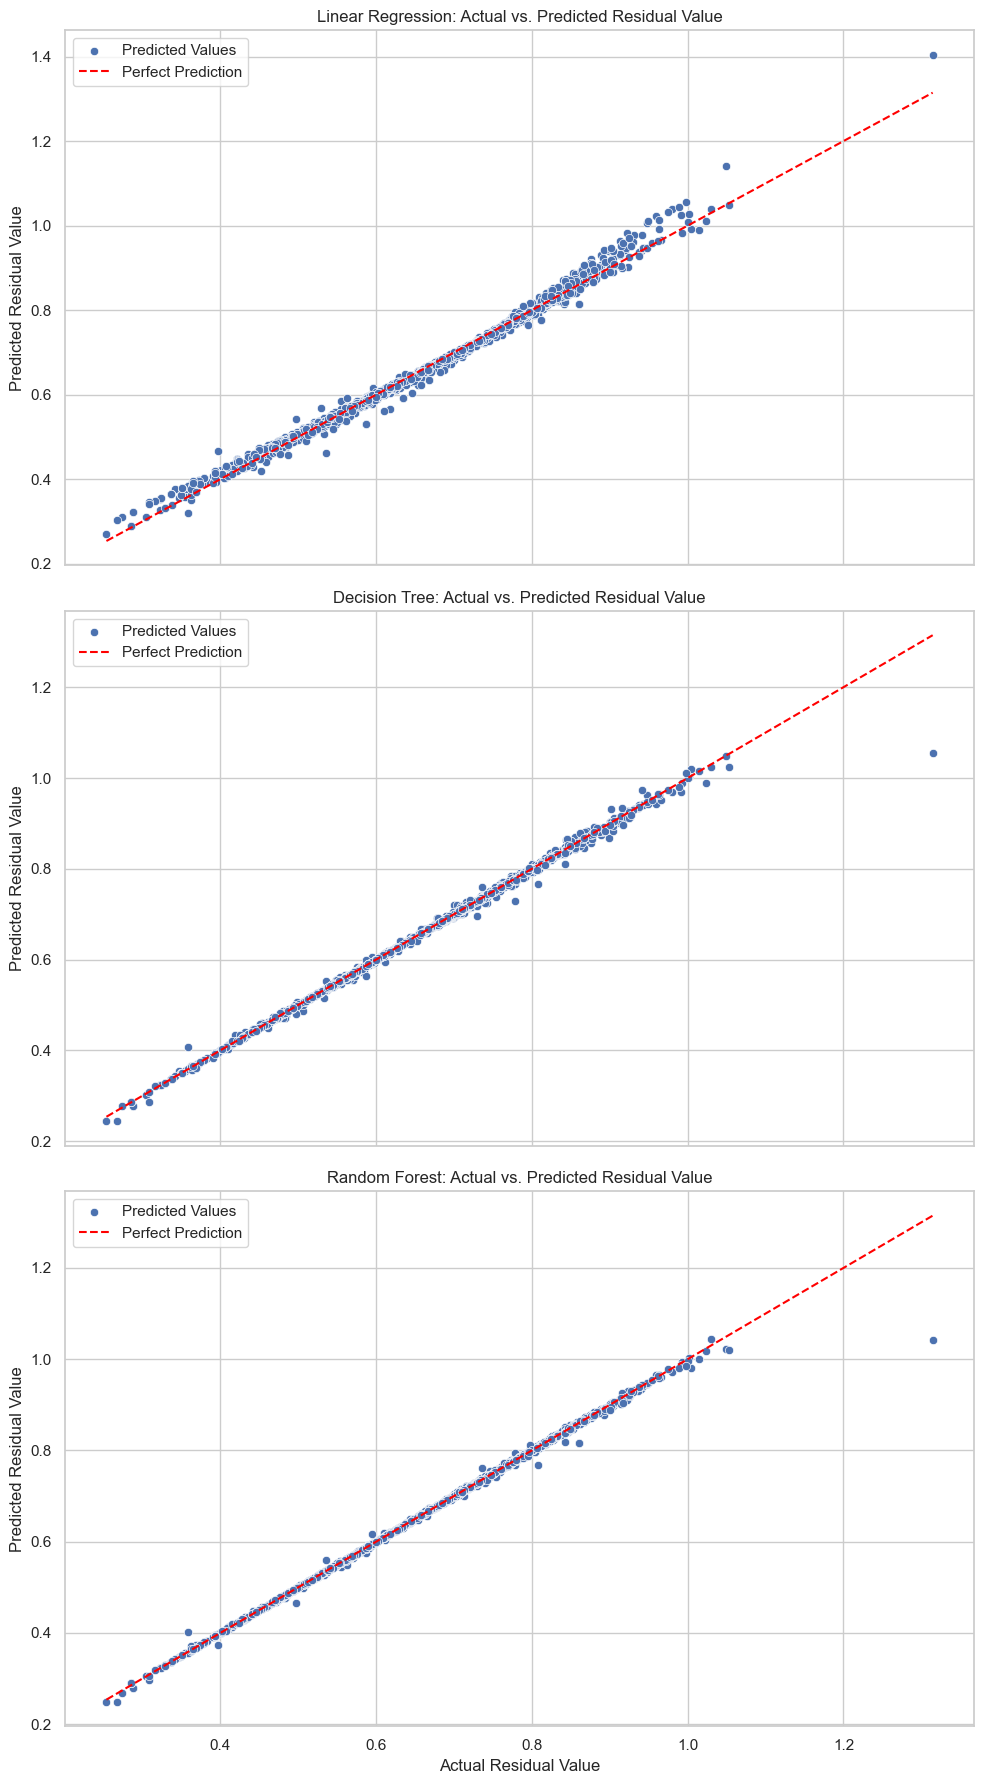

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Scatter plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0], label="Predicted Values")
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[0].set_ylabel("Predicted Residual Value")
axes[0].set_title("Linear Regression: Actual vs. Predicted Residual Value")
axes[0].legend()

# Scatter plot for Decision Tree
sns.scatterplot(x=y_test, y=y_pred_dt, ax=axes[1], label="Predicted Values")
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[1].set_ylabel("Predicted Residual Value")
axes[1].set_title("Decision Tree: Actual vs. Predicted Residual Value")
axes[1].legend()

# Scatter plot for Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[2], label="Predicted Values")
axes[2].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[2].set_xlabel("Actual Residual Value")
axes[2].set_ylabel("Predicted Residual Value")
axes[2].set_title("Random Forest: Actual vs. Predicted Residual Value")
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Linear Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")

    # Print cross-validation results
    print(f"{model_name} Cross-Validation R² Scores: {cv_scores}")
    print(f"{model_name} Mean Cross-Validation R² Score: {cv_scores.mean()}\n")

Linear Regression Cross-Validation R² Scores: [0.99343028 0.99485934 0.98489209 0.99330329 0.98159503]
Linear Regression Mean Cross-Validation R² Score: 0.989616005697677

Decision Tree Cross-Validation R² Scores: [0.99805387 0.996889   0.98092721 0.99430394 0.98924594]
Decision Tree Mean Cross-Validation R² Score: 0.9918839926537807

Random Forest Cross-Validation R² Scores: [0.99928767 0.99708885 0.984134   0.99766922 0.99204393]
Random Forest Mean Cross-Validation R² Score: 0.9940447329179815



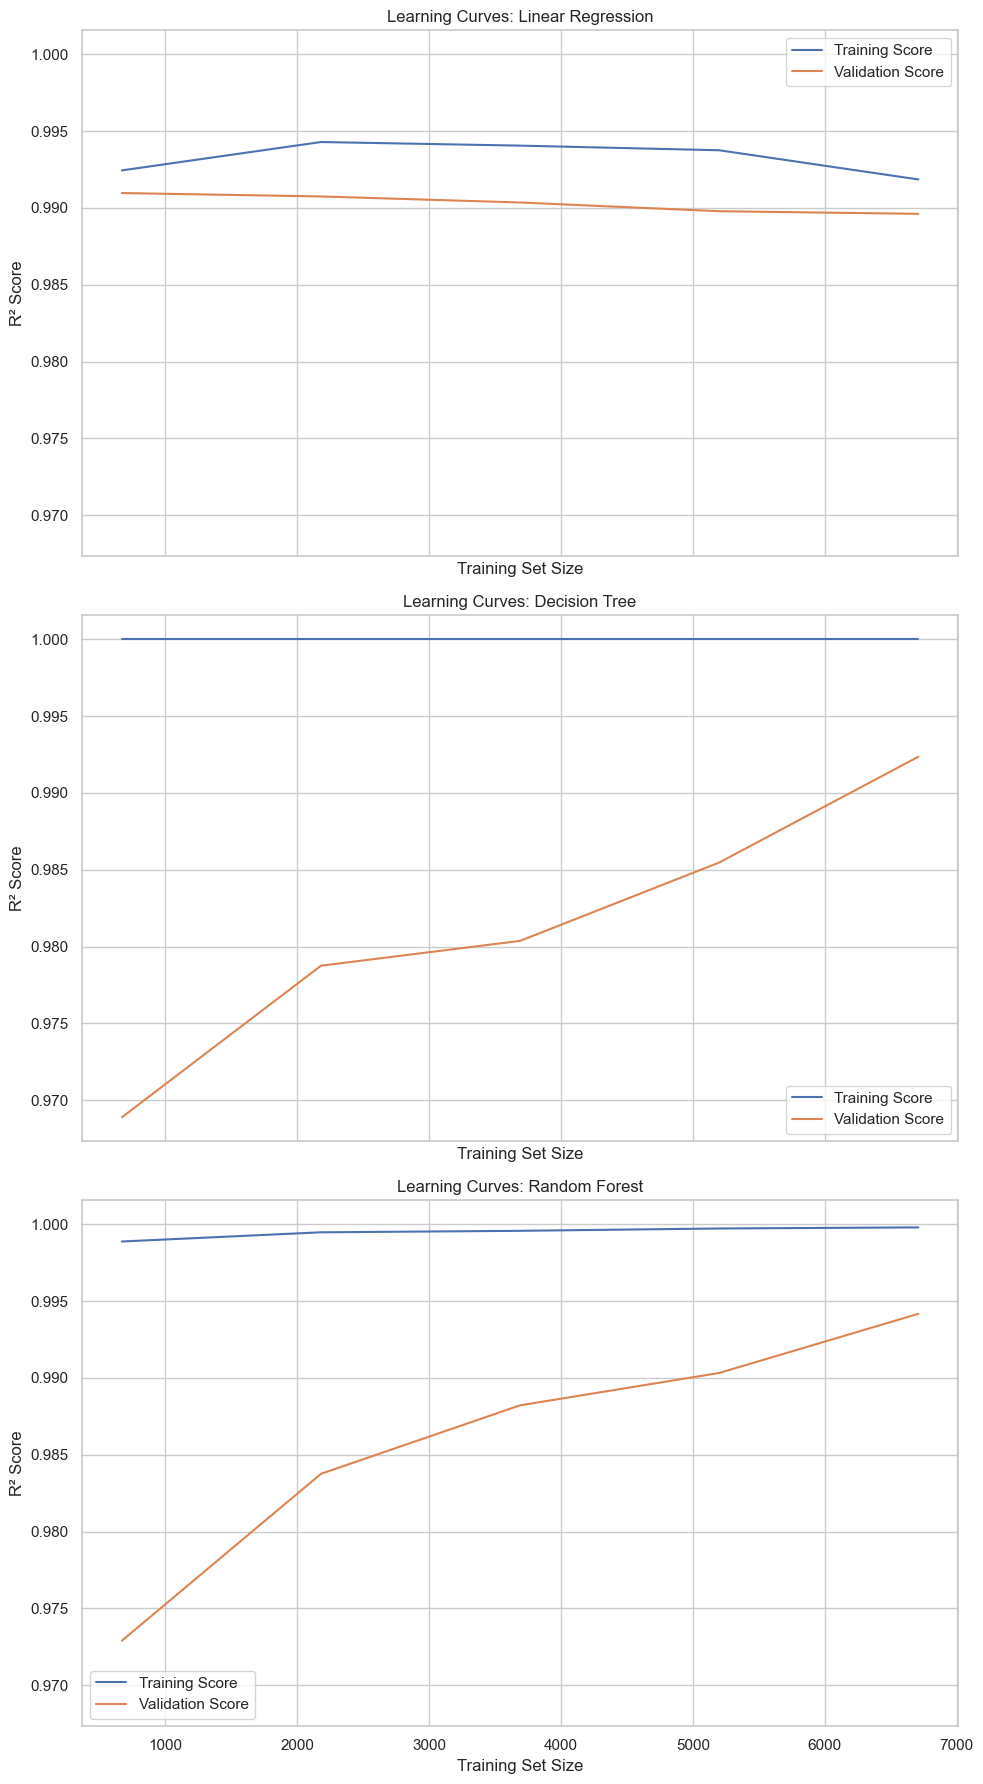

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define models
models = {
    "Linear Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
}

# Create subplots for learning curves
fig, axes = plt.subplots(len(models), 1, figsize=(10, 18), sharex=True, sharey=True)

for i, (model_name, model) in enumerate(models.items()):
    # Compute learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="r2", n_jobs=-1
    )

    # Compute mean and standard deviation of training and test scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    # Plot learning curves
    axes[i].plot(train_sizes, train_mean, label="Training Score")
    axes[i].plot(train_sizes, test_mean, label="Validation Score")
    axes[i].set_title(f"Learning Curves: {model_name}")
    axes[i].set_xlabel("Training Set Size")
    axes[i].set_ylabel("R² Score")
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()